<a href="https://colab.research.google.com/github/wooookim/ML-DL/blob/main/2_2_KNN_%ED%9B%88%EB%A0%A8_%ED%85%8C%EC%8A%A4%ED%8A%B8_%EC%84%B8%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

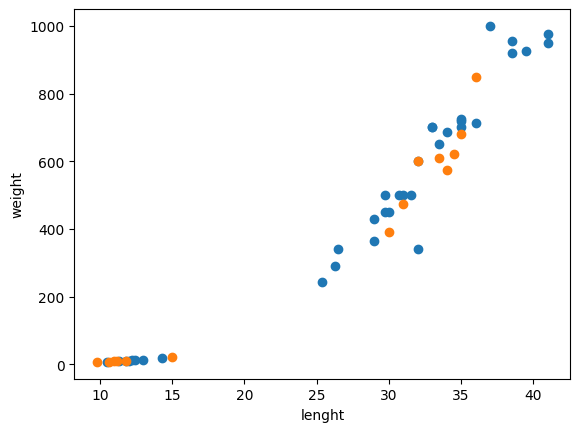

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [9]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14      # 입력과 타겟 길이가 다르면 어떻게 될까

'''
샘플 = 하나의 데이터 -> 49개 샘플
'''

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

# 훈련-테스트 세트 분할
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

'''
샘플링 편향
- 훈련 세트와 테스트 세트에 샘플이 잘 섞여있지 않으면 샘플링이 한쪽으로 치우치게 됨
'''

# 샘플 셔플
import numpy as np
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:,1])
plt.scatter(test_input[:, 0], test_input[:,1])
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

'''
fit을 수행할 때마다 KNeighborsClassifier 클래스의 객체는 이전 학흡한 모든 내용을 잃음
'''

# knn 적용
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)
kn.predict(test_input)
test_target

'''
사이킷런 출력 = 넘파이 배열
'''